### 1. Problem Statement

###### Ranking potential customers (leads) based on their level of interest and readiness to make a purchase or take a desired action


In [1]:
import pandas as pd
import numpy as np

### 2. Data Gathering

In [2]:
df = pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Lead Origin

In [5]:
df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [6]:
df = pd.get_dummies(df,columns = ['Lead Origin'],dtype = int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

### Lead Source

In [8]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [9]:
df['Lead Source'].isna().sum()

36

In [10]:
df['Lead Source']=df['Lead Source'].replace(['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [11]:
df['Lead Source'].value_counts()

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: count, dtype: int64

In [12]:
df['Lead Source'].value_counts().to_dict()

{'Google': 2868,
 'Direct Traffic': 2543,
 'Olark Chat': 1755,
 'Organic Search': 1154,
 'Reference': 534,
 'Welingak Website': 142,
 'Referral Sites': 125,
 'Facebook': 55,
 'Others': 28}

In [13]:
df['Lead Source']=df['Lead Source'].map({'Google': 8,
 'Direct Traffic': 7,
 'Olark Chat': 6,
 'Organic Search':5,
 'Reference':4,
 'Welingak Website':3,
 'Referral Sites': 2,
 'Facebook': 1,
 'Others': 0})

In [14]:
df['Lead Source']

0       6.0
1       5.0
2       7.0
3       7.0
4       8.0
       ... 
9235    7.0
9236    7.0
9237    7.0
9238    8.0
9239    7.0
Name: Lead Source, Length: 9240, dtype: float64

### Do Not Email

In [15]:
df['Do Not Email'].value_counts().to_dict()

{'No': 8506, 'Yes': 734}

##### No Null values on this column

In [16]:
df['Do Not Email']=df['Do Not Email'].replace({'No': 1, 'Yes': 0})

In [17]:
df['Do Not Email']

0       1
1       1
2       1
3       1
4       1
       ..
9235    0
9236    1
9237    0
9238    1
9239    1
Name: Do Not Email, Length: 9240, dtype: int64

### Do Not Call

##### No null values on columns

In [18]:
df['Do Not Call'].value_counts().to_dict()

{'No': 9238, 'Yes': 2}

In [19]:
df['Do Not Call']=df['Do Not Call'].replace({'No': 1, 'Yes': 0})

In [20]:
df['Do Not Call']

0       1
1       1
2       1
3       1
4       1
       ..
9235    1
9236    1
9237    1
9238    1
9239    1
Name: Do Not Call, Length: 9240, dtype: int64

### TotalVisits

In [21]:
df['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

### Total Time Spent on Website

In [22]:
df['Total Time Spent on Website']

0          0
1        674
2       1532
3        305
4       1428
        ... 
9235    1845
9236     238
9237     199
9238     499
9239    1279
Name: Total Time Spent on Website, Length: 9240, dtype: int64

### Page Views Per Visit

In [23]:
df['Page Views Per Visit']

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64

### Last Activity

In [24]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [25]:
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [26]:
df['Last Activity'].isna().sum()

0

In [27]:
df = pd.get_dummies(df,columns=['Last Activity'],dtype=int)

In [28]:
df

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,6.0,1,1,0,0.0,0,0.00,NaN,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,5.0,1,1,0,5.0,674,2.50,India,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,7.0,1,1,1,2.0,1532,2.00,India,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,7.0,1,1,0,1.0,305,1.00,India,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,8.0,1,1,1,2.0,1428,1.00,India,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,7.0,0,1,1,8.0,1845,2.67,Saudi Arabia,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,7.0,1,1,0,2.0,238,2.00,India,...,0,0,0,0,0,1,0,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,7.0,0,1,0,2.0,199,2.00,India,...,0,0,0,0,0,1,0,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,8.0,1,1,1,3.0,499,3.00,India,...,0,0,0,0,0,1,0,0,0,0


### Country

In [29]:
df['Country'].unique().tolist()

[nan,
 'India',
 'Russia',
 'Kuwait',
 'Oman',
 'United Arab Emirates',
 'United States',
 'Australia',
 'United Kingdom',
 'Bahrain',
 'Ghana',
 'Singapore',
 'Qatar',
 'Saudi Arabia',
 'Belgium',
 'France',
 'Sri Lanka',
 'China',
 'Canada',
 'Netherlands',
 'Sweden',
 'Nigeria',
 'Hong Kong',
 'Germany',
 'Asia/Pacific Region',
 'Uganda',
 'Kenya',
 'Italy',
 'South Africa',
 'Tanzania',
 'unknown',
 'Malaysia',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Philippines',
 'Bangladesh',
 'Vietnam',
 'Indonesia']

In [30]:
df['Country']=df['Country'].replace(['Russia',
 'Kuwait',
 'Oman',
 'United Arab Emirates',
 'United States',
 'Australia',
 'United Kingdom',
 'Bahrain',
 'Ghana',
 'Singapore',
 'Qatar',
 'Saudi Arabia',
 'Belgium',
 'France',
 'Sri Lanka',
 'China',
 'Canada',
 'Netherlands',
 'Sweden',
 'Nigeria',
 'Hong Kong',
 'Germany',
 'Asia/Pacific Region',
 'Uganda',
 'Kenya',
 'Italy',
 'South Africa',
 'Tanzania',
 'unknown',
 'Malaysia',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Philippines',
 'Bangladesh',
 'Vietnam',
 'Indonesia'],'Other')

In [31]:
df['Country'].isna().sum()

2461

In [32]:
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [33]:
df['Country'].isna().sum()

0

In [34]:
df['Country'].value_counts().to_dict()

{'India': 8953, 'Other': 287}

In [35]:
df = pd.get_dummies(df, columns =['Country'],dtype=int)

### Specialization

In [36]:
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [37]:
df['Specialization'].isna().sum()

1438

In [38]:
df['Specialization']=df['Specialization'].fillna(df['Specialization'].mode()[0])

In [39]:
df['Specialization'].isna().sum()

0

In [40]:
df = pd.get_dummies(df,columns=['Specialization'],dtype=int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9240 non-null   object 
 1   Lead Number                                       9240 non-null   int64  
 2   Lead Source                                       9204 non-null   float64
 3   Do Not Email                                      9240 non-null   int64  
 4   Do Not Call                                       9240 non-null   int64  
 5   Converted                                         9240 non-null   int64  
 6   TotalVisits                                       9103 non-null   float64
 7   Total Time Spent on Website                       9240 non-null   int64  
 8   Page Views Per Visit                              9103 non-null   float64
 9   How did you hear ab

### How did you hear about X Education 

In [42]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [43]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna(df['How did you hear about X Education'].mode()[0])

In [44]:
df['How did you hear about X Education'].isna().sum()

0

In [45]:
df = pd.get_dummies(df,columns=['How did you hear about X Education'],dtype=int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 85 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               9240 non-null   object 
 1   Lead Number                                               9240 non-null   int64  
 2   Lead Source                                               9204 non-null   float64
 3   Do Not Email                                              9240 non-null   int64  
 4   Do Not Call                                               9240 non-null   int64  
 5   Converted                                                 9240 non-null   int64  
 6   TotalVisits                                               9103 non-null   float64
 7   Total Time Spent on Website                               9240 non-null   int64  
 8   Page Views Per Vis

### What is your current occupation

In [47]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [48]:
df['What is your current occupation'].isna().sum()

2690

In [49]:
df['What is your current occupation']=df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0])

In [50]:
df['What is your current occupation'].isna().sum()

0

In [51]:
df= pd.get_dummies(df,columns=['What is your current occupation'],dtype=int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 90 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               9240 non-null   object 
 1   Lead Number                                               9240 non-null   int64  
 2   Lead Source                                               9204 non-null   float64
 3   Do Not Email                                              9240 non-null   int64  
 4   Do Not Call                                               9240 non-null   int64  
 5   Converted                                                 9240 non-null   int64  
 6   TotalVisits                                               9103 non-null   float64
 7   Total Time Spent on Website                               9240 non-null   int64  
 8   Page Views Per Vis

### What matters most to you in choosing a course

In [53]:
df['What matters most to you in choosing a course'].value_counts().to_dict()

{'Better Career Prospects': 6528, 'Flexibility & Convenience': 2, 'Other': 1}

In [54]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0])

In [55]:
df['What matters most to you in choosing a course'].isna().sum()

0

In [56]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace({'Better Career Prospects': 2, 'Flexibility & Convenience': 1, 'Other': 0})

### Search 

In [57]:
df['Search'].value_counts().to_dict()

{'No': 9226, 'Yes': 14}

In [58]:
df['Search']=df['Search'].replace({'No': 1, 'Yes': 0})

### Magazine

In [59]:
df['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [60]:
df['Magazine']=df['Magazine'].replace({'No':1})

### Newspaper Article

In [61]:
df['Newspaper Article'].value_counts().to_dict()

{'No': 9238, 'Yes': 2}

In [62]:
df['Newspaper Article']=df['Newspaper Article'].replace({'No': 1, 'Yes': 0})

### X Education Forums

In [63]:
df['X Education Forums'].value_counts().to_dict()

{'No': 9239, 'Yes': 1}

In [64]:
df['X Education Forums']=df['X Education Forums'].replace({'No': 1, 'Yes': 0})

### Newspaper

In [65]:
df['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [66]:
df['Newspaper']=df['Newspaper'].replace({'No': 1, 'Yes': 0})

### Digital Advertisement

In [67]:
df['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [68]:
df['Digital Advertisement']=df['Digital Advertisement'].replace({'No': 1, 'Yes': 0})

### Through Recommendations

In [69]:
df['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [70]:
df['Through Recommendations']=df['Through Recommendations'].replace({'No': 1, 'Yes': 0})


### Receive More Updates About Our Courses

In [71]:
df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [72]:
df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].replace({'No': 1})

### Tags

In [73]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [74]:
df=df.drop(['Tags'],axis=1)

### Lead Quality 

In [75]:
df['Lead Quality'].value_counts().to_dict()

{'Might be': 1560,
 'Not Sure': 1092,
 'High in Relevance': 637,
 'Worst': 601,
 'Low in Relevance': 583}

In [76]:
df['Lead Quality']=df['Lead Quality'].fillna(df['Lead Quality'].mode()[0])

In [77]:
df['Lead Quality']=df['Lead Quality'].replace({'Might be': 4,
 'Not Sure': 3,
 'High in Relevance': 2,
 'Worst': 1,
 'Low in Relevance': 0})

### Update me on Supply Chain Content

In [78]:
df['Update me on Supply Chain Content'].value_counts()


Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [79]:
df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].replace({'No':1})

### Get updates on DM Content

In [80]:
df['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [81]:
df['Get updates on DM Content']=df['Get updates on DM Content'].replace({'No':1})

### Lead Profile 

In [82]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [83]:
df['Lead Profile'].isna().sum()

2709

In [84]:
df['Lead Profile']=df['Lead Profile'].fillna(df['Lead Profile'].mode()[0])

In [85]:
df=pd.get_dummies(df,columns=['Lead Profile'],dtype=int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 94 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               9240 non-null   object 
 1   Lead Number                                               9240 non-null   int64  
 2   Lead Source                                               9204 non-null   float64
 3   Do Not Email                                              9240 non-null   int64  
 4   Do Not Call                                               9240 non-null   int64  
 5   Converted                                                 9240 non-null   int64  
 6   TotalVisits                                               9103 non-null   float64
 7   Total Time Spent on Website                               9240 non-null   int64  
 8   Page Views Per Vis

### City 

In [87]:
df['City'].unique().tolist()

['Select',
 'Mumbai',
 nan,
 'Thane & Outskirts',
 'Other Metro Cities',
 'Other Cities',
 'Other Cities of Maharashtra',
 'Tier II Cities']

In [88]:
df['City']=df['City'].replace(['Mumbai','Thane & Outskirts'],'Mumbai')

In [89]:
df['City'].unique().tolist()

['Select',
 'Mumbai',
 nan,
 'Other Metro Cities',
 'Other Cities',
 'Other Cities of Maharashtra',
 'Tier II Cities']

In [90]:
df['City']=df['City'].replace(['nan',
 'Other Metro Cities',
 'Other Cities',
 'Other Cities of Maharashtra',
 'Tier II Cities'],'Other')

In [91]:
df['City'].value_counts().to_dict()

{'Mumbai': 3974, 'Select': 2249, 'Other': 1597}

In [92]:
df['City']=df['City'].replace([
 'Select'],'Other')

In [93]:
df['City'].value_counts().to_dict()

{'Mumbai': 3974, 'Other': 3846}

In [94]:
df = pd.get_dummies(df,columns = ['City'],dtype=int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               9240 non-null   object 
 1   Lead Number                                               9240 non-null   int64  
 2   Lead Source                                               9204 non-null   float64
 3   Do Not Email                                              9240 non-null   int64  
 4   Do Not Call                                               9240 non-null   int64  
 5   Converted                                                 9240 non-null   int64  
 6   TotalVisits                                               9103 non-null   float64
 7   Total Time Spent on Website                               9240 non-null   int64  
 8   Page Views Per Vis

### Asymmetrique Activity Index 

In [96]:
df['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [97]:
df['Asymmetrique Activity Index'].value_counts().to_dict()

{'02.Medium': 3839, '01.High': 821, '03.Low': 362}

In [98]:
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].replace({'02.Medium': 1, '01.High': 2, '03.Low': 0})

### Asymmetrique Profile Index

In [99]:
df['Asymmetrique Profile Index'].value_counts().to_dict()

{'02.Medium': 2788, '01.High': 2203, '03.Low': 31}

In [100]:
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].replace({'02.Medium': 1, '01.High': 2, '03.Low': 0})

### Asymmetrique Activity Score

In [101]:
df['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [102]:
df['Asymmetrique Activity Score'].isna().sum()

4218

### Asymmetrique Profile Score

In [103]:
df['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [104]:
df['Asymmetrique Profile Score'].isna().sum()

4218

### I agree to pay the amount through cheque 

In [105]:
df['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [106]:
df['I agree to pay the amount through cheque']=df['I agree to pay the amount through cheque'].replace({'No':1})

### A free copy of Mastering The Interview

In [107]:
df['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [108]:
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].replace({'No':0,'Yes':1})

### Last Notable Activity

In [109]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [110]:
df['Last Notable Activity']=df['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked',
                                                                'Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',
                                                                'Email Marked Spam','Approached upfront','Resubscribed to emails',
                                                                 'View in browser link Clicked','Form Submitted on Website','Email Received',
                                                                ],'Other')

In [111]:
df['Last Notable Activity'].value_counts().to_dict()

{'Modified': 3407, 'Email Opened': 2827, 'SMS Sent': 2172, 'Other': 834}

In [112]:
df = pd.get_dummies(df,columns=['Last Notable Activity'],dtype=int)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 98 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               9240 non-null   object 
 1   Lead Number                                               9240 non-null   int64  
 2   Lead Source                                               9204 non-null   float64
 3   Do Not Email                                              9240 non-null   int64  
 4   Do Not Call                                               9240 non-null   int64  
 5   Converted                                                 9240 non-null   int64  
 6   TotalVisits                                               9103 non-null   float64
 7   Total Time Spent on Website                               9240 non-null   int64  
 8   Page Views Per Vis

In [114]:
df= df.drop(['Prospect ID','Lead Number'],axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lead Source                                               9204 non-null   float64
 1   Do Not Email                                              9240 non-null   int64  
 2   Do Not Call                                               9240 non-null   int64  
 3   Converted                                                 9240 non-null   int64  
 4   TotalVisits                                               9103 non-null   float64
 5   Total Time Spent on Website                               9240 non-null   int64  
 6   Page Views Per Visit                                      9103 non-null   float64
 7   What matters most to you in choosing a course             9240 non-null   int64  
 8   Search            

### KNN Imputer

In [116]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [117]:
x = df.drop('Converted',axis=1)
y = df['Converted']

In [118]:
kkn_imputer = KNNImputer()

In [119]:
array = kkn_imputer.fit_transform(x)

In [120]:
x = pd.DataFrame(array,columns=x.columns)
x

,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,6.0,1.0,1.0,0.0,0.0,0.00,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.0,1.0,1.0,5.0,674.0,2.50,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,7.0,1.0,1.0,2.0,1532.0,2.00,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,7.0,1.0,1.0,1.0,305.0,1.00,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8.0,1.0,1.0,2.0,1428.0,1.00,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,7.0,0.0,1.0,8.0,1845.0,2.67,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9236,7.0,1.0,1.0,2.0,238.0,2.00,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9237,7.0,0.0,1.0,2.0,199.0,2.00,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9238,8.0,1.0,1.0,3.0,499.0,3.00,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Outliers Handeling

In [121]:
def Outlier_detection(array):
    Q1 = array.quantile(0.25)
    Q3 = array.quantile(0.75)
    
    IQR = Q3-Q1
    upper_tale = Q3 + 1.5*(IQR)
    lower_tale = Q1 - 1.5*(IQR)
    
    outlier = np.where((array>upper_tale) |(array<lower_tale))
    print(upper_tale)
    print(lower_tale)
    return outlier     

### TotalVisits- Outliers

In [122]:
Outlier_detection(df['TotalVisits'])

11.0
-5.0


(array([  56,   58,  102,  125,  168,  188,  191,  229,  235,  244,  246,
         281,  292,  345,  387,  423,  469,  554,  579,  648,  658,  663,
         748,  767,  775,  781,  812,  818,  840,  849,  896,  913,  917,
         928, 1023, 1115, 1160, 1205, 1283, 1321, 1459, 1491, 1506, 1520,
        1566, 1580, 1605, 1617, 1662, 1697, 1741, 1760, 1824, 1831, 1867,
        1953, 2006, 2049, 2055, 2082, 2121, 2154, 2172, 2190, 2219, 2244,
        2289, 2307, 2322, 2323, 2367, 2378, 2403, 2407, 2420, 2511, 2547,
        2563, 2624, 2769, 2784, 2799, 2815, 2825, 2861, 2882, 2888, 2911,
        2950, 2978, 3093, 3175, 3203, 3315, 3376, 3389, 3399, 3485, 3501,
        3513, 3522, 3589, 3609, 3828, 3908, 3965, 3984, 4018, 4021, 4071,
        4134, 4242, 4252, 4275, 4334, 4349, 4382, 4449, 4471, 4518, 4536,
        4544, 4545, 4574, 4601, 4659, 4686, 4698, 4888, 4903, 4929, 4954,
        4974, 5026, 5033, 5078, 5089, 5129, 5147, 5164, 5177, 5193, 5260,
        5283, 5308, 5317, 5335, 5349, 

In [123]:
import seaborn as sns

<Axes: >

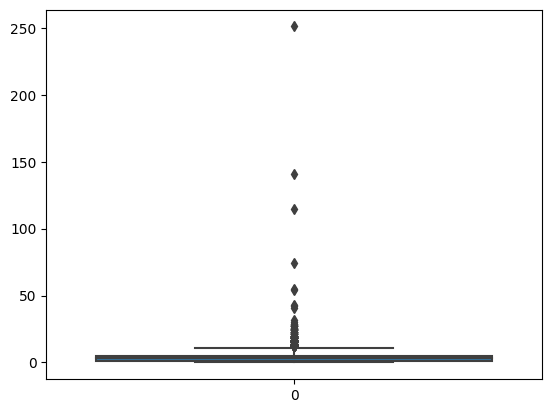

In [124]:
sns.boxplot(df['TotalVisits'])

<Axes: xlabel='TotalVisits', ylabel='Converted'>

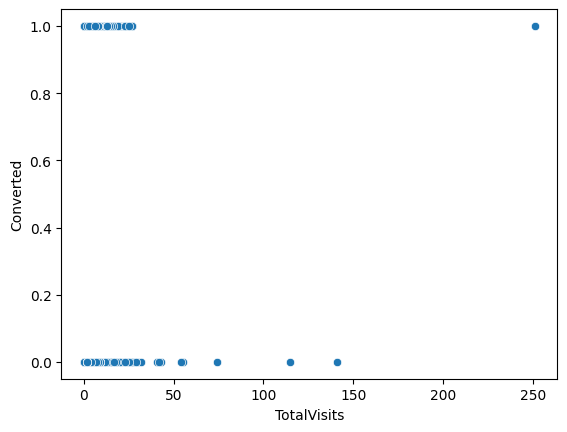

In [125]:
sns.scatterplot(x = df['TotalVisits'],y=df['Converted'])

<Axes: xlabel='TotalVisits', ylabel='Total Time Spent on Website'>

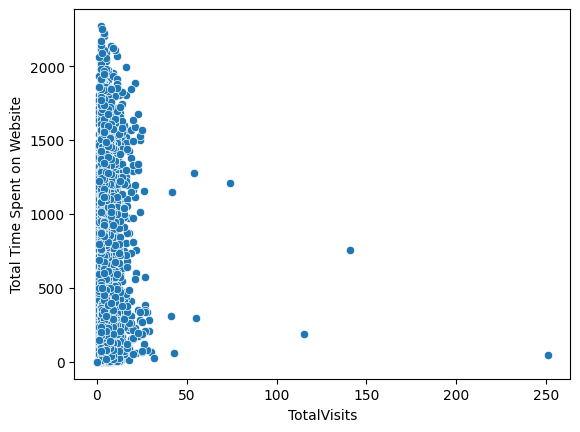

In [126]:
sns.scatterplot(x=df['TotalVisits'],y=df['Total Time Spent on Website'])

In [127]:
df['TotalVisits']=np.where(df['TotalVisits'] >100,df['TotalVisits'].mean(),df['TotalVisits'])

<Axes: >

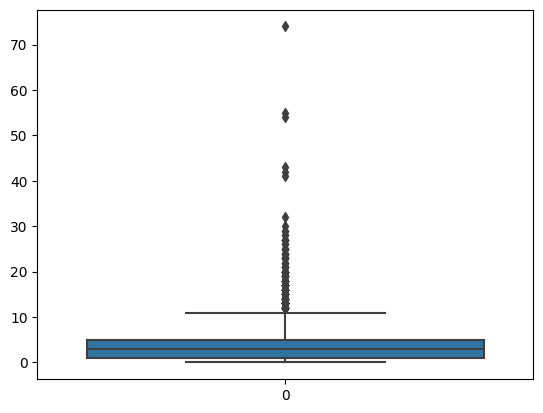

In [128]:
sns.boxplot(df['TotalVisits'])

### Total Time Spent on Website- Outlier handeling

<Axes: >

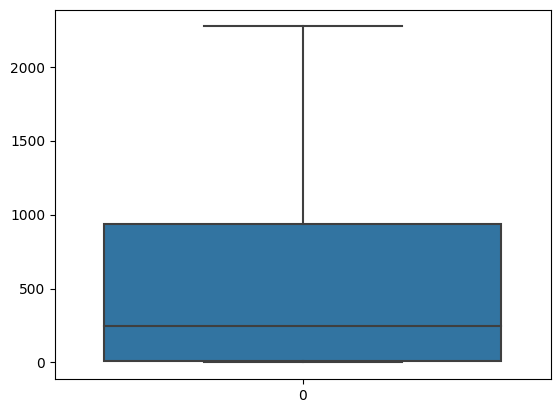

In [129]:
sns.boxplot(df['Total Time Spent on Website'])

In [130]:
Outlier_detection(df['Total Time Spent on Website'])

2322.0
-1374.0


(array([], dtype=int64),)

<Axes: xlabel='Total Time Spent on Website', ylabel='Converted'>

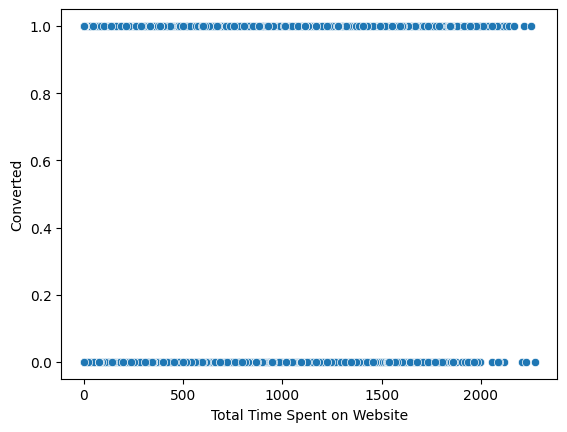

In [131]:
sns.scatterplot(x =df['Total Time Spent on Website'],y=df['Converted'] )

### Page Views Per Visit- Outlier Detection

<Axes: >

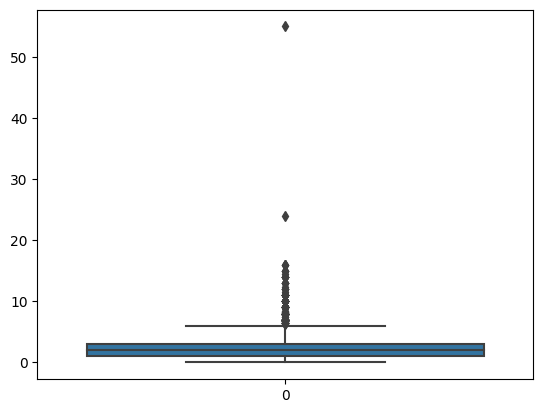

In [132]:
sns.boxplot(df['Page Views Per Visit'])

In [133]:
Outlier_detection(df['Page Views Per Visit'])

6.0
-2.0


(array([  10,   12,   41,   56,   57,   58,  125,  168,  172,  173,  201,
         229,  238,  246,  264,  282,  292,  294,  303,  322,  331,  375,
         382,  387,  415,  417,  423,  427,  429,  430,  438,  471,  521,
         537,  549,  553,  554,  565,  574,  579,  621,  646,  704,  734,
         757,  771,  781,  788,  840,  842,  884,  885,  890,  902,  924,
         951,  961,  967,  974,  978,  997, 1021, 1157, 1199, 1202, 1207,
        1325, 1336, 1345, 1349, 1419, 1437, 1438, 1478, 1517, 1533, 1605,
        1640, 1659, 1675, 1697, 1713, 1723, 1726, 1729, 1792, 1795, 1812,
        1824, 1875, 1885, 1895, 1915, 1989, 2006, 2010, 2096, 2102, 2103,
        2111, 2181, 2190, 2195, 2235, 2237, 2260, 2309, 2322, 2408, 2409,
        2618, 2621, 2640, 2714, 2826, 2830, 2867, 2897, 2908, 2919, 2936,
        2950, 2963, 2994, 3075, 3079, 3081, 3084, 3115, 3203, 3214, 3293,
        3296, 3415, 3449, 3454, 3573, 3577, 3589, 3651, 3693, 3771, 3828,
        3830, 3847, 3875, 3965, 3971, 

<Axes: xlabel='Page Views Per Visit', ylabel='Converted'>

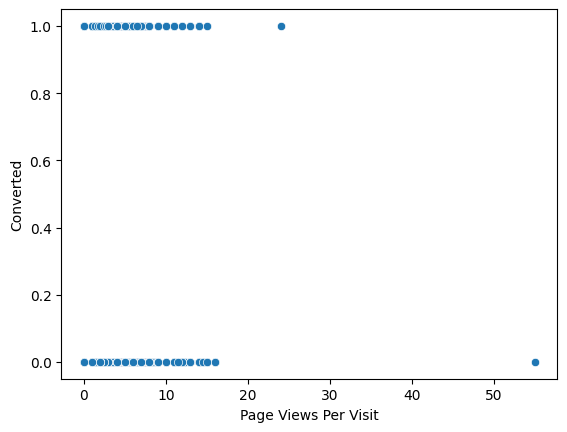

In [134]:
sns.scatterplot(x=df['Page Views Per Visit'],y = df['Converted'])

In [135]:
df['Page Views Per Visit']= np.where(df['Page Views Per Visit']>20,df['Page Views Per Visit'].mean(),df['Page Views Per Visit'])

<Axes: >

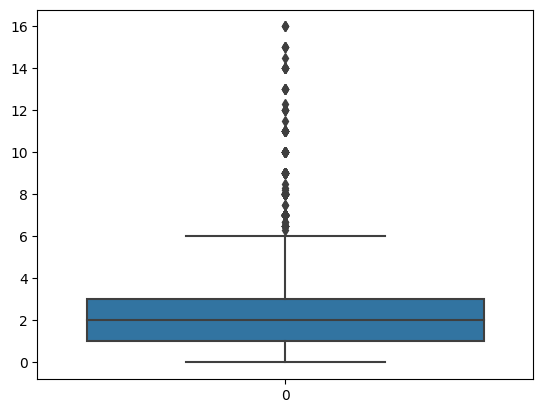

In [136]:
sns.boxplot(df['Page Views Per Visit'])

## Correlation coefficient

In [137]:
df.corr().T

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Magazine,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
Lead Source,1.000000,0.000875,0.005022,-0.114455,0.136146,0.204167,0.191281,0.005799,0.005837,NaN,...,0.024653,-0.090135,0.059947,0.022410,0.236408,-0.195615,0.042564,-0.036777,0.004872,-0.007744
Do Not Email,0.000875,1.000000,-0.004322,0.135580,-0.021644,0.046374,-0.025806,-0.004991,-0.011443,NaN,...,0.001229,0.066561,-0.040659,-0.052370,-0.026123,0.013409,0.188089,-0.117259,-0.143504,0.025990
Do Not Call,0.005022,-0.004322,1.000000,-0.018581,-0.004495,-0.006801,0.006099,-0.000250,-0.000573,NaN,...,0.003471,-0.012614,0.008133,0.002408,-0.016938,0.012424,0.009769,-0.019252,0.004635,0.008157
Converted,-0.114455,0.135580,-0.018581,1.000000,0.036698,0.362483,-0.002743,0.004727,0.002261,NaN,...,-0.007648,0.378061,-0.294656,-0.117030,0.051860,0.125317,-0.021955,-0.244294,-0.074044,0.351845
TotalVisits,0.136146,-0.021644,-0.004495,0.036698,1.000000,0.299185,0.646358,0.010471,-0.066301,NaN,...,0.028921,0.008124,-0.007704,-0.043058,0.272396,-0.115229,0.057657,-0.130141,0.119328,0.003131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Other,-0.195615,0.013409,0.012424,0.125317,-0.115229,-0.048933,-0.111711,0.014347,-0.012264,NaN,...,0.012080,0.017129,-0.037771,0.047784,-0.733538,1.000000,-0.017006,-0.055113,-0.031520,0.102487
Last Notable Activity_Email Opened,0.042564,0.188089,0.009769,-0.021955,0.057657,0.009585,0.071126,0.011281,-0.034518,NaN,...,0.066219,0.013920,-0.053833,0.010706,0.061738,-0.017006,1.000000,-0.507426,-0.209132,-0.368056
Last Notable Activity_Modified,-0.036777,-0.117259,-0.019252,-0.244294,-0.130141,-0.106857,-0.103457,-0.022232,0.018237,NaN,...,0.021516,-0.066038,0.030452,0.045232,-0.055415,-0.055113,-0.507426,1.000000,-0.240729,-0.423664
Last Notable Activity_Other,0.004872,-0.143504,0.004635,-0.074044,0.119328,-0.020590,-0.030746,0.005352,0.002560,NaN,...,0.003454,-0.033419,0.014905,0.040871,-0.022651,-0.031520,-0.209132,-0.240729,1.000000,-0.174610


<Axes: >

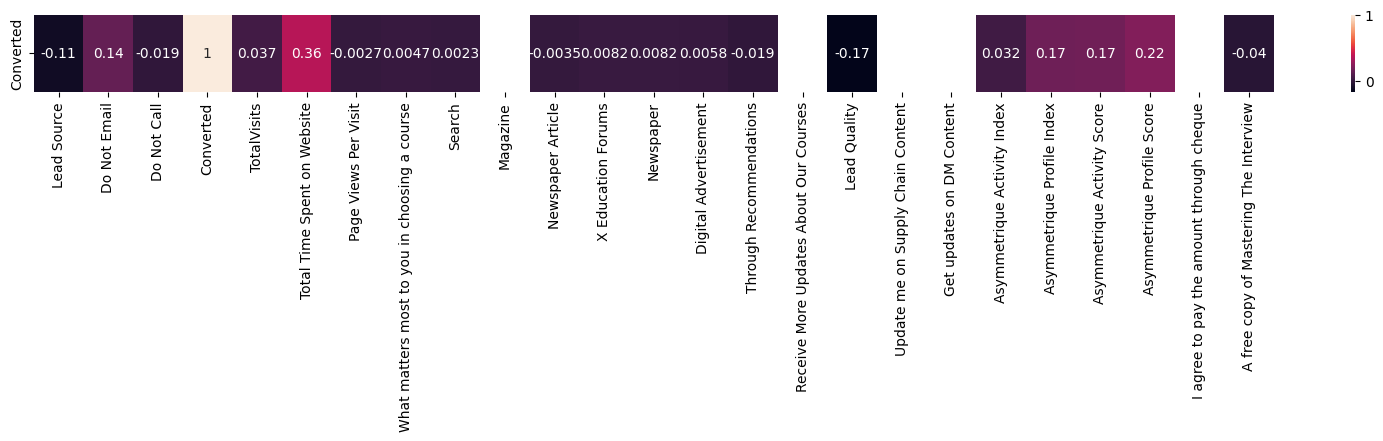

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[3:4,0:25],annot=True)

<Axes: >

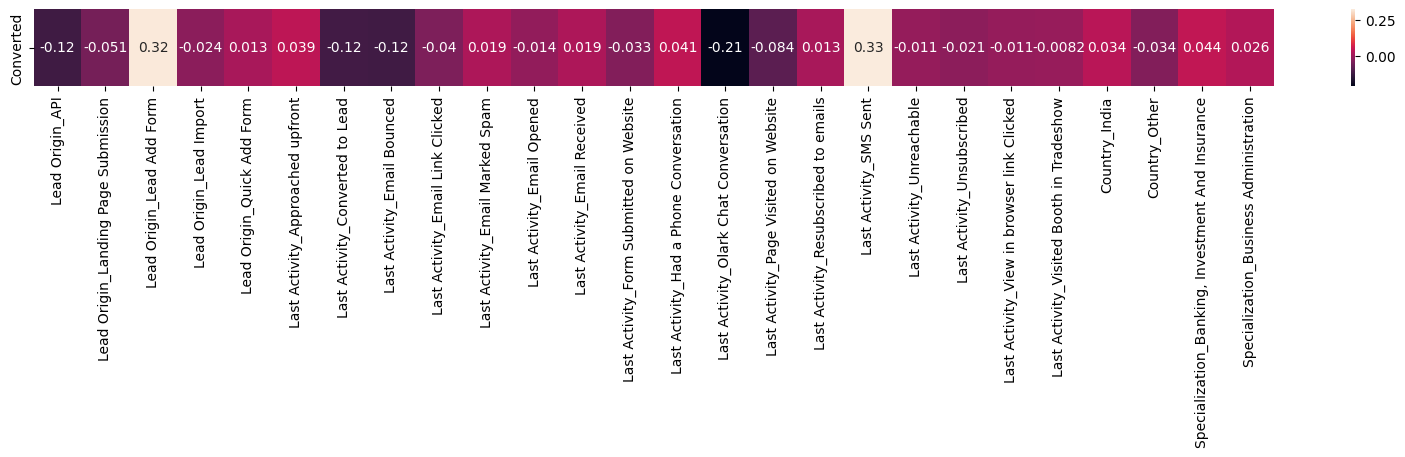

In [139]:

plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[3:4,25:51],annot=True)

<Axes: >

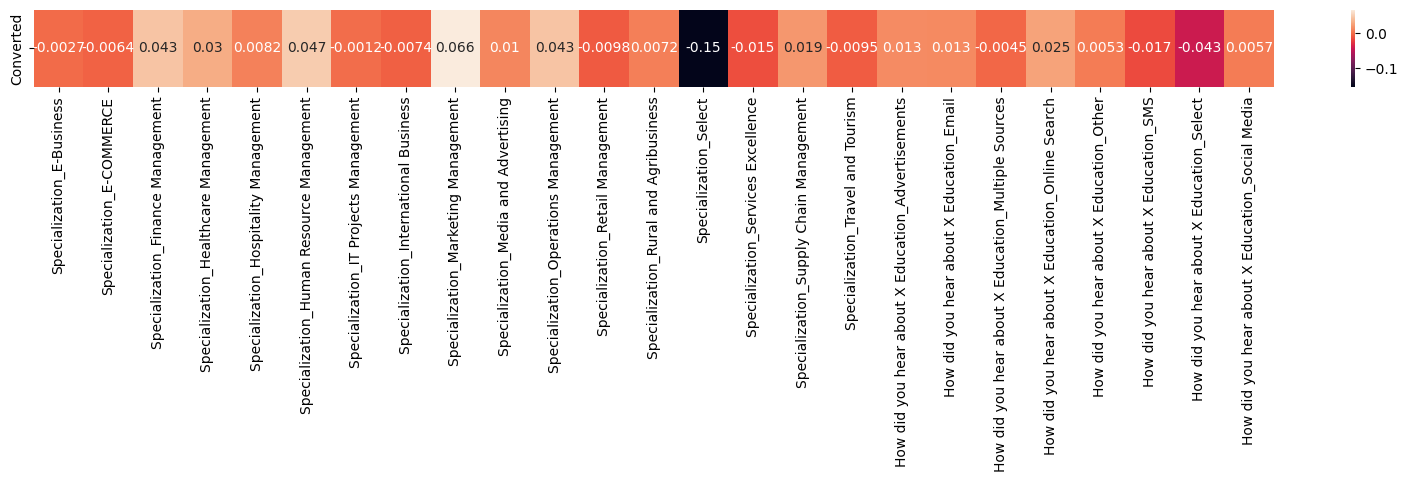

In [140]:

plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[3:4,51:76],annot=True)

<Axes: >

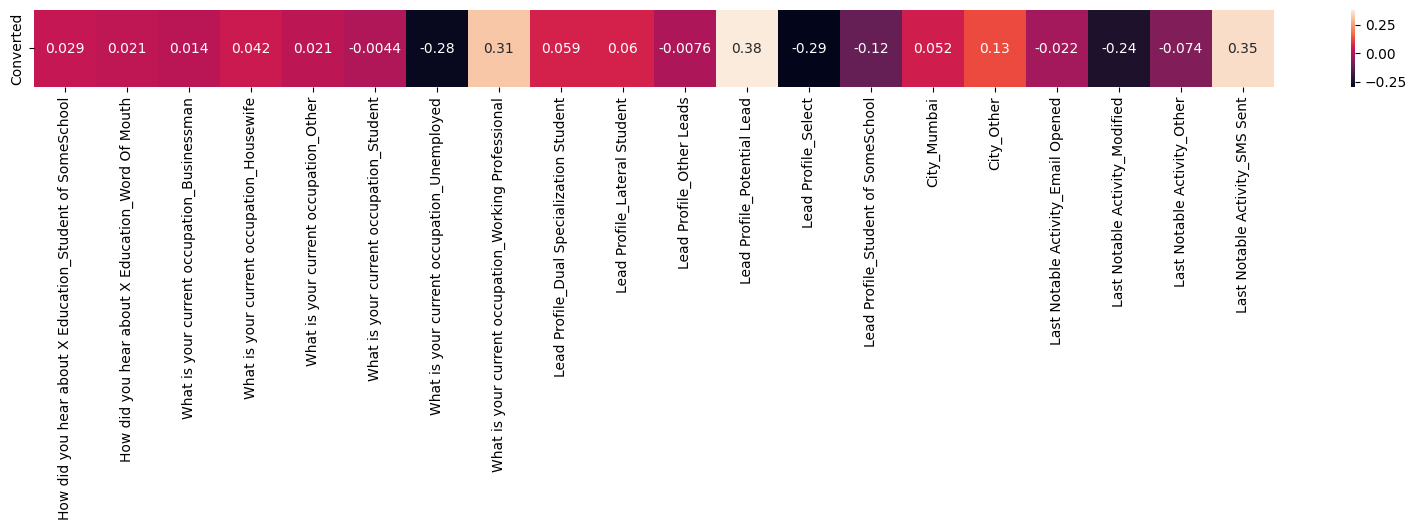

In [141]:

plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[3:4,76:96],annot=True)

## Model Training

In [142]:
##Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [145]:
log_reg = LogisticRegression()

In [146]:
log_reg.fit(x_train,y_train)

C:\Users\DJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
y_pred_test = log_reg.predict(x_test)
y_pred_train = log_reg.predict(x_train)

### Train Accuracy

In [148]:
print(accuracy_score(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

0.8304924242424242
[[4004  539]
 [ 714 2135]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4543
           1       0.80      0.75      0.77      2849

    accuracy                           0.83      7392
   macro avg       0.82      0.82      0.82      7392
weighted avg       0.83      0.83      0.83      7392



### Test Accuracy

In [149]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

0.8306277056277056
[[1010  126]
 [ 187  525]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.81      0.74      0.77       712

    accuracy                           0.83      1848
   macro avg       0.83      0.81      0.82      1848
weighted avg       0.83      0.83      0.83      1848



In [150]:
#Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt_clf = DecisionTreeClassifier()

In [153]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [154]:
y_pred_test = dt_clf.predict(x_test)
y_pred_train = dt_clf.predict(x_train)

### Train Accuracy

In [155]:
print(accuracy_score(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

0.9863365800865801
[[4502   41]
 [  60 2789]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4543
           1       0.99      0.98      0.98      2849

    accuracy                           0.99      7392
   macro avg       0.99      0.98      0.99      7392
weighted avg       0.99      0.99      0.99      7392



### Test Accuracy

In [156]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

0.8246753246753247
[[960 176]
 [148 564]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1136
           1       0.76      0.79      0.78       712

    accuracy                           0.82      1848
   macro avg       0.81      0.82      0.82      1848
weighted avg       0.83      0.82      0.83      1848



In [157]:
#hyperparameter tuning

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : np.arange(5,20),
            "min_samples_leaf" : np.arange(2,10)}

dt_clf = DecisionTreeClassifier(random_state=10)

gscv_dt_clf = GridSearchCV(dt_clf, hyp_grid, scoring=None,cv = 4, n_jobs=-1) # cv >> 3 to 10
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [160]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=18, random_state=10)

In [161]:
dt_clf_s =gscv_dt_clf.best_estimator_

In [162]:
dt_clf_s.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=18, random_state=10)

In [163]:
y_pred_test=dt_clf_s.predict(x_test)
y_pred_train=dt_clf_s.predict(x_train)

### Test

In [164]:
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1136
           1       0.83      0.74      0.78       712

    accuracy                           0.84      1848
   macro avg       0.84      0.82      0.83      1848
weighted avg       0.84      0.84      0.84      1848

[[1025  111]
 [ 185  527]]
0.8398268398268398


### Train

In [165]:
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4543
           1       0.87      0.77      0.82      2849

    accuracy                           0.87      7392
   macro avg       0.87      0.85      0.86      7392
weighted avg       0.87      0.87      0.87      7392

[[4215  328]
 [ 652 2197]]
0.8674242424242424


In [166]:
dt_clf_s.feature_importances_

array([0.00891795, 0.00721279, 0.        , 0.01861223, 0.26108395,
       0.01173049, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04508041, 0.        , 0.        , 0.00185261, 0.00218769,
       0.08559387, 0.01187766, 0.        , 0.00198326, 0.        ,
       0.00182207, 0.20835864, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00253644,
       0.        , 0.        , 0.        , 0.01078788, 0.00232587,
       0.        , 0.00362802, 0.        , 0.        , 0.        ,
       0.        , 0.00123705, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00085755, 0.        , 0.        , 0.00098269, 0.        ,
       0.        , 0.        , 0.        , 0.00830732, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00063823, 0.        , 0.        , 0.        , 0.     

In [167]:
s1 = pd.Series(dt_clf_s.feature_importances_, index=x.columns)
s1

Lead Source                           0.008918
Do Not Email                          0.007213
Do Not Call                           0.000000
TotalVisits                           0.018612
Total Time Spent on Website           0.261084
                                        ...   
City_Other                            0.013516
Last Notable Activity_Email Opened    0.005700
Last Notable Activity_Modified        0.003713
Last Notable Activity_Other           0.000000
Last Notable Activity_SMS Sent        0.131058
Length: 95, dtype: float64

In [182]:
s1.sort_values(axis=0, ascending=False, inplace=True)
top_features=s1[:30]
top_features

Total Time Spent on Website                             0.261084
Lead Origin_Lead Add Form                               0.208359
Last Notable Activity_SMS Sent                          0.131058
Lead Profile_Potential Lead                             0.094998
Asymmetrique Activity Score                             0.085594
Lead Quality                                            0.045080
What is your current occupation_Working Professional    0.037391
TotalVisits                                             0.018612
City_Other                                              0.013516
Asymmetrique Profile Score                              0.011878
Page Views Per Visit                                    0.011730
Last Activity_Olark Chat Conversation                   0.010788
Lead Source                                             0.008918
What is your current occupation_Unemployed              0.008557
Specialization_Select                                   0.008307
City_Mumbai              

<Axes: >

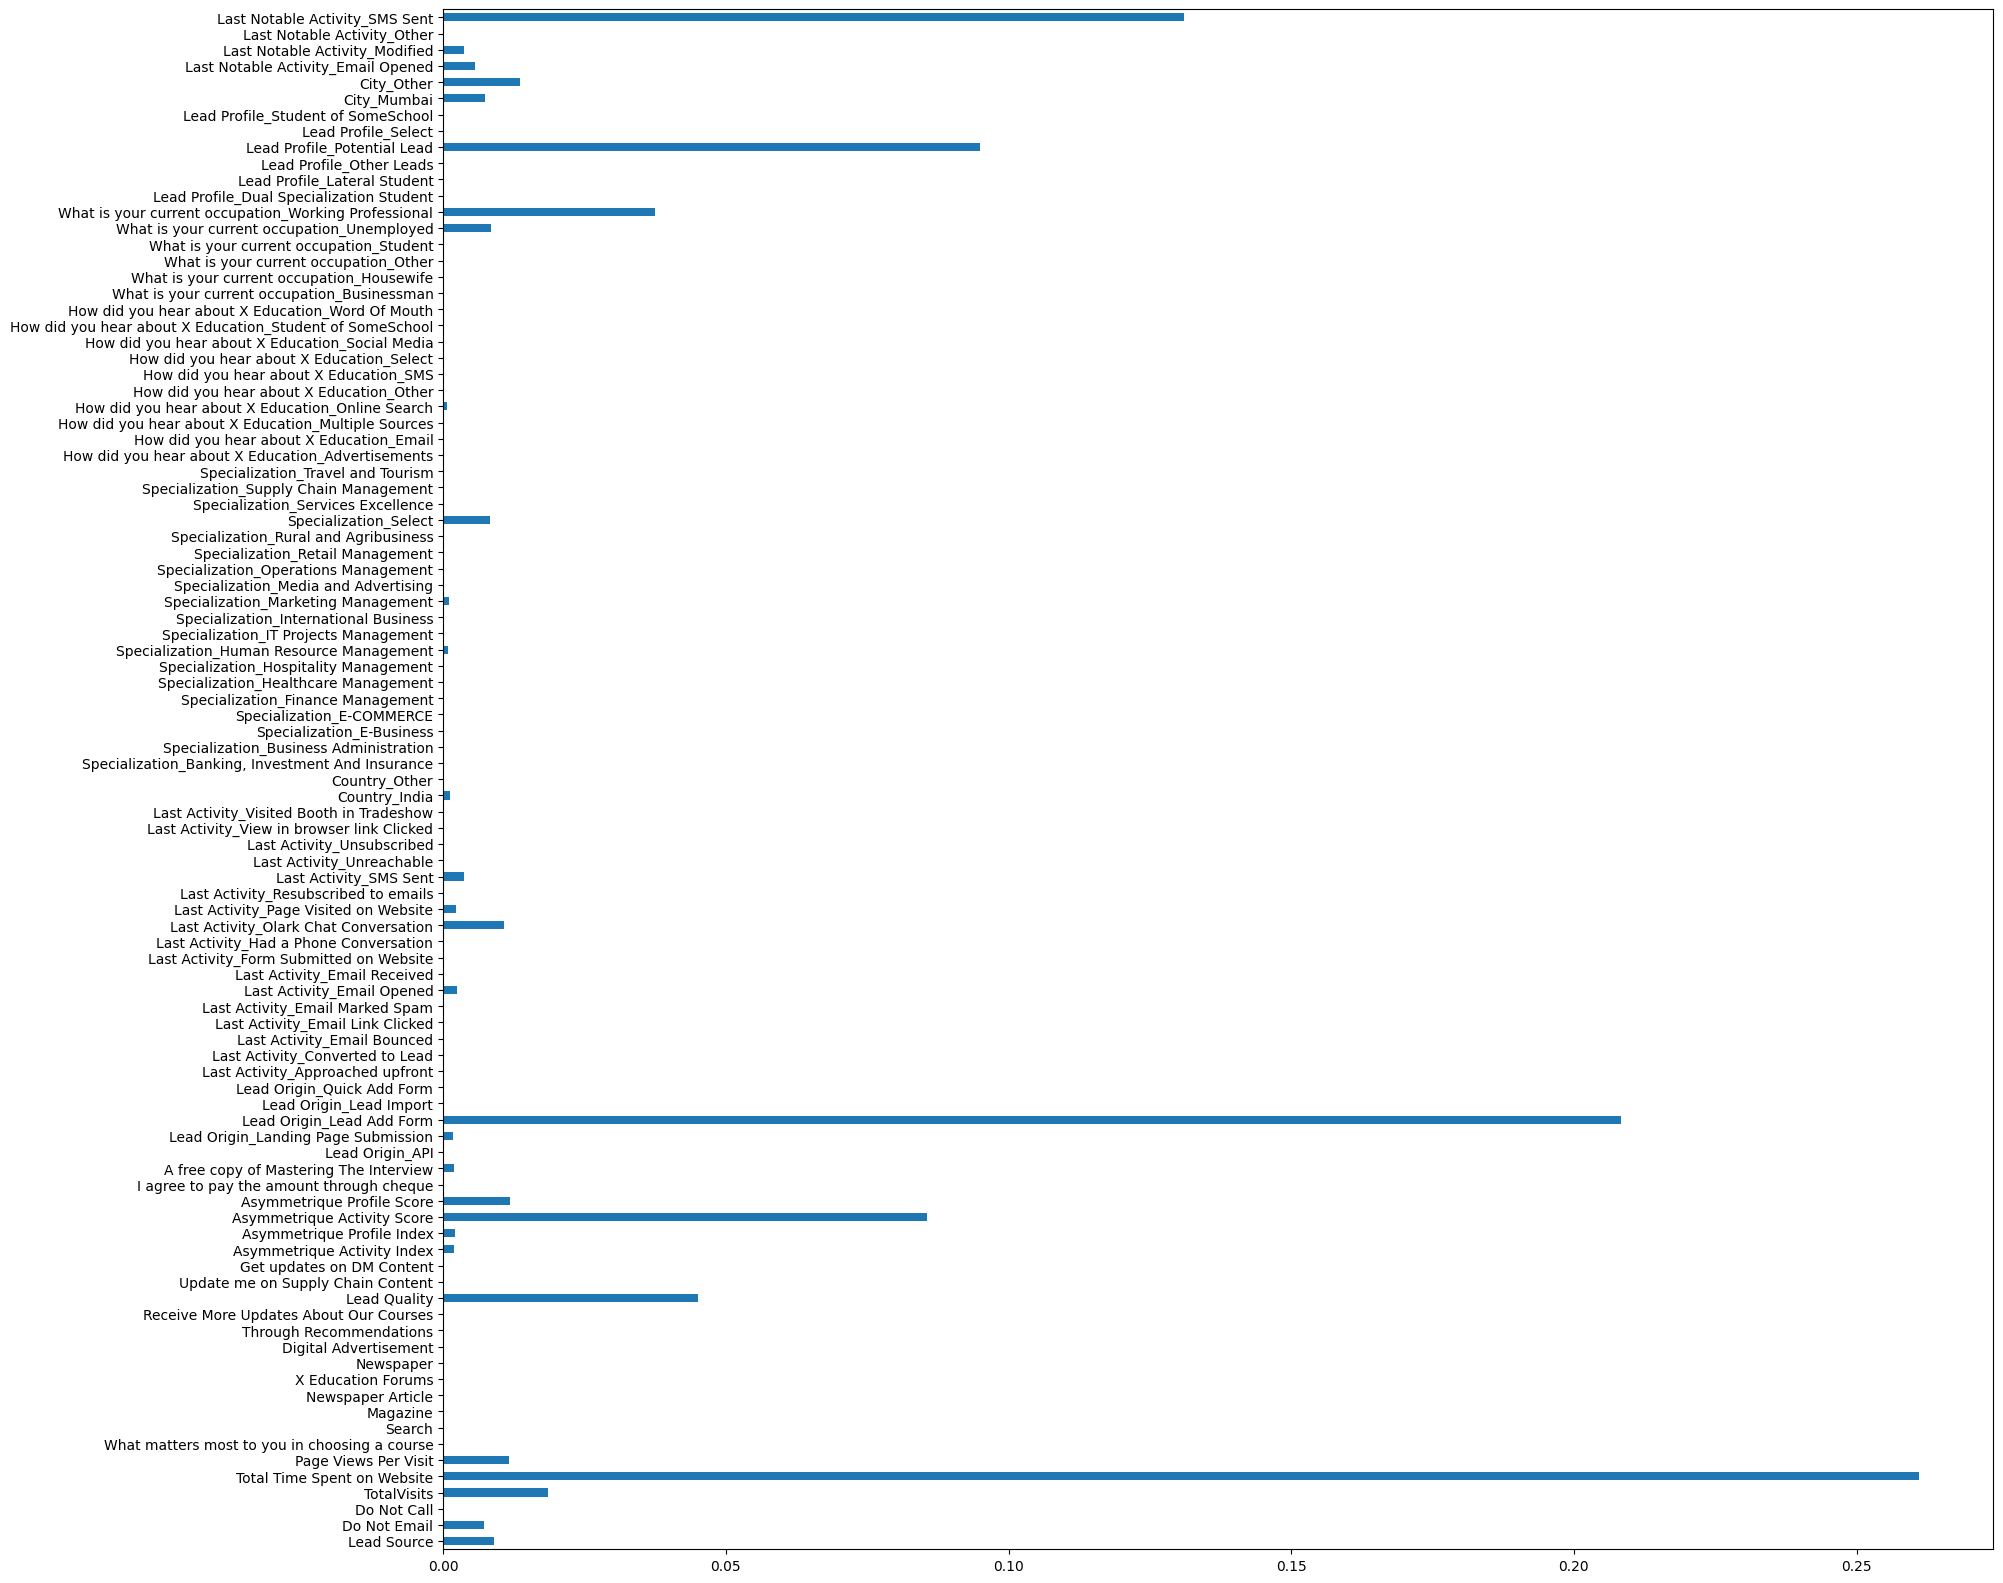

In [185]:
plt.figure(figsize=(20,20))
s1 = pd.Series(top_features, index = x.columns)
s1.plot(kind = 'barh')